In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import statistics
import math

In [26]:
data = pd.read_csv('data/merged.csv', index_col = 0)
data

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,...,lyric_stemmed,debut_date_y,peak_position_y,peak_date_y,weeks_on_chart_y,debut_date,peak_position,peak_date,weeks_on_chart,on_billboard
0,tim mcgraw,Taylor Swift,Taylor Swift,2006-10-24,232106,49,0.580,0.57500,0.491,0.000000,...,he said the way my blue eye shine put those ge...,09.23.06,40.0,01.13.07,20.0,09.23.06,40.0,01.13.07,20.0,1
12,stay beautiful,Taylor Swift,Taylor Swift,2006-10-24,236053,48,0.594,0.08680,0.629,0.000000,...,friday night beneath the star in a field behin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
11,picture to burn,Taylor Swift,Taylor Swift,2006-10-24,173066,54,0.658,0.17300,0.877,0.000000,...,whi would you wanna break a perfectli good hea...,03.01.08,28.0,05.17.08,20.0,03.01.08,28.0,05.17.08,20.0,1
9,cold as you,Taylor Swift,Taylor Swift,2006-10-24,239013,50,0.418,0.21700,0.482,0.000000,...,i wa ridin' shotgun with my hair undon in the ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,the outside,Taylor Swift,Taylor Swift,2006-10-24,207106,47,0.589,0.00491,0.805,0.000000,...,"she said, i wa seven and you were nine i look ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,bigger than the whole sky,Midnights (3am Edition),Taylor Swift,2022-10-21,218502,85,0.422,0.82600,0.235,0.006480,...,lavend haze lyric meet me at midnight stare at...,11.05.22,21.0,11.05.22,4.0,11.05.22,21.0,11.05.22,4.0,1
158,karma,Midnights (3am Edition),Taylor Swift,2022-10-21,204852,86,0.649,0.07400,0.622,0.000000,...,vigilant shit lyric draw the cat eye sharp eno...,11.05.22,9.0,11.05.22,6.0,11.05.22,9.0,11.05.22,6.0,1
172,bejeweled,Midnights (3am Edition),Taylor Swift,2022-10-21,194165,86,0.700,0.06610,0.550,0.000102,...,labyrinth lyric it onli hurt thi much right no...,11.05.22,6.0,11.05.22,6.0,11.05.22,6.0,11.05.22,6.0,1
164,labyrinth,Midnights (3am Edition),Taylor Swift,2022-10-21,247962,84,0.487,0.79100,0.313,0.348000,...,maroon lyric when the morn came we were clean ...,11.05.22,14.0,11.05.22,5.0,11.05.22,14.0,11.05.22,5.0,1


In [27]:
# get subset of relevant spotify features + billboard binary
temp = data.iloc[:,6:15]
temp['album'] = data['album']
temp['on_billboard'] = data.iloc[:,-1]
data = temp
features = list(data.columns)
del features[len(features) - 2:]
features

['danceability',
 'acousticness',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'valence',
 'tempo']

In [28]:
# Normalizing columns
for f in features:
    data[f] = (data[f]- data[f].mean()) / data[f].std()

print((data[features[0]]).mean()) # should be ~ zero
print((data[features[0]]).std()) # should be ~ 1

1.1229842088162504e-16
1.0


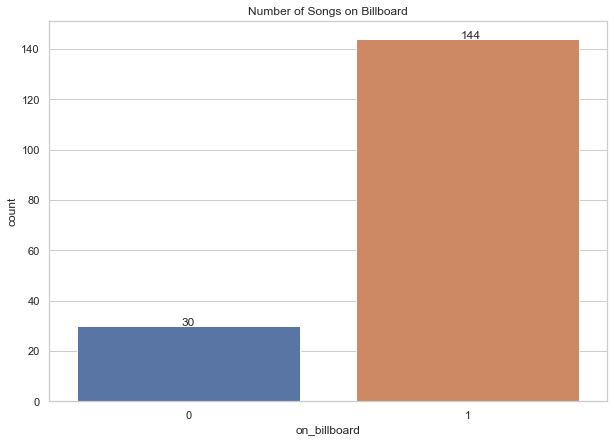

In [29]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (10,7))
ax = sns.countplot(x=data['on_billboard'])
for p, label in zip(ax.patches, data['on_billboard'].value_counts(ascending=True)):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))
plt.title("Number of Songs on Billboard")
plt.show()

In [44]:
pd.crosstab(data.album,data.on_billboard)
# .plot(kind='bar', figsize = (10,7))
# plt.title('Songs in Each Album on Billboard')
# plt.xlabel('Album')
# plt.ylabel('Number of Songs');

on_billboard,0,1
album,,
1989 (Deluxe),5,11
Fearless (Taylor's Version),23,0
Lover,1,15
Midnights (3am Edition),0,17
Red (Deluxe Edition),4,16
Taylor Swift,9,4
evermore (deluxe version),0,11
folklore (deluxe version),0,15
reputation,8,6


0.7586206896551724
y = 0.918459 + (0.044938 * x1) + (0.123965 * x2) + (0.316326 * x3) + (0.473033 * x4)
0.6547737070742807


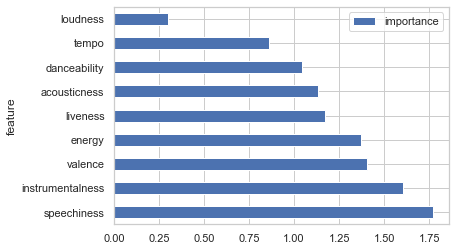

In [15]:
model = LogisticRegression(random_state=0).fit(data[features].values, data['On Billboard'].values)
score = model.score(data[features].values, data['On Billboard'].values)
print(score) # 75 % is not great

w0 = model.intercept_[0]
w = model.coef_[0]
 
equation = "y = %f + (%f * x1) + (%f * x2) + (%f * x3) + (%f * x4)" % (w0, w[0], w[1], w[2], w[3])
print(equation)

idx = 99
x = data.iloc[idx][features].values
y = model.predict_proba(x.reshape(1, -1))[0]
print(y[1])

feature_importance = pd.DataFrame(features, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
 
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()


## TFIDF Kmeans and PCA:

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
tfidf = pd.read_csv('data/tfidf_embedding.csv')

In [6]:
# Function to get album
def get_album(song, data):
    return (data.loc[data.name == song,'album']).to_string(index=False)

tfidf_df = tfidf.loc[:, tfidf.columns != 'name']

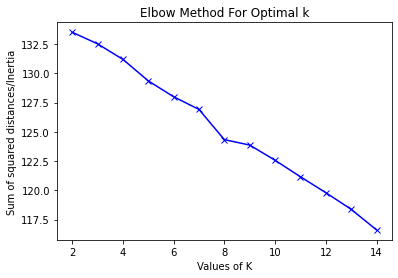

In [9]:
# Elbow method to determine optimal number of clusters
ss_dist = []
K = range(2,15) # possible number of clusters
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(tfidf_df)
    ss_dist.append(kmeans.inertia_)
plt.plot(K,ss_dist,'bx-')
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show(); # Shows that there is no optimal number of clusters

In [16]:
# For a 10 clusters solution maybe the songs are aligned by albums
kmeans = KMeans(n_clusters=8)
kmeans.fit(tfidf_df)
clusters = kmeans.labels_
pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(tfidf_df)
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]
print(pca.explained_variance_ratio_)
data1 = data.copy()
data1['Cluster'] = clusters
data1['x0'] = x0
data1['x1'] = x1

[0.02666947 0.02162473]


ValueError: Length of values (145) does not match length of index (169)

In [ ]:
# Cluster by album
pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(tfidf_df)
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]
print(pca.explained_variance_ratio_)
data1['Album'] = data1['album']
data1['x0'] = x0
data1['x1'] = x1

# # set image size
plt.figure(figsize=(12, 7))
# set title
plt.title("Taylor Swift Lyrics TF-IDF Colored by Album", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
#  create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=data1, x='x0', y='x1', hue='Album', palette="viridis")
plt.show()
